## Box plot on Iris data set

In this notebook, I perform a box plot on the Iris data set.

First, lets talk about some basic statistics.

A box plot is useful for comparisons between multiple group data. It is great for providing information at glance!

### Box Plot
Has 5 points: lower limit, first quantil (1/4), median (1/2), third quantil (3/4) and upper limit.

- **Lower limit** presents the smallest values from our data.

- **first quantil** presents the value where below it we have 25% of our data (1/4), and above it, 75%, or, for Cumulative Distribution Function (**CDF**), presents the sum of $f$ of 25% probability.

- **Median** presents the half point, where above it is located 50% of the data, and below it, the other half.

- **Third quantil** presents the value where below it we have 75% of our data (3/4), and above it, 25%, or, for **CDF**, presents the sum of $f$ of 75% probability.

- **Upper limit** presents the highest value from our data.

The **Cumulative Distribution Function** gives the probability of a function to assume a value that is less or equal of the given value.

**Cumulative Distribution Function** is a *function* $F_X : \mathbb{R} \rightarrow [0,1]$ defined by

$$
F_X(x)=\mathbb{P}(X\leq x)
$$
It is right-continuous, non-decresing and defined fo all $x$ such that
$$
\lim\limits_{x\to +\infty} F(x)=1 \\
\lim\limits_{x\to -\infty} F(x)=0
$$

If $X$ is **discrete**, we define the **probability function** $f$ for $X$ by $f_X(x) = \mathbb{P}(X=x)$. Its our good old $f$.

If $X$ is **continuous**, then the **probability density function (PDF)** is defined $\int^{\infty}_{-\infty} f_X(x) \,dx = 1$ and for every $a \leq b$,
$$
\mathbb{P}(a<X<b) = \int^{b}_{a} f_X(x) \, dx
$$

***E.g.* Iris data set with CDF**

First, lets start by importing our necessary libraries:

In [1]:
import matplotlib.pyplot as plt        # to plot figures
import numpy as np                     # to work with specific functions, like 'unique'
from sklearn.datasets import load_iris #import the Iris data set

In [2]:
iris = load_iris() # loads the dataset

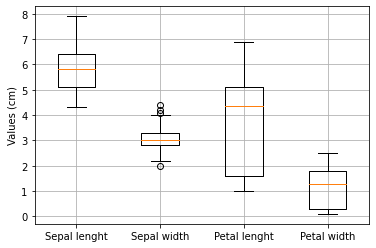

In [3]:
sl   = iris.data[:,0] # selecting the sepal lenght (cm) column
sw   = iris.data[:,1] # sepal width (cm)
pl   = iris.data[:,2] # petal width (cm)
pw   = iris.data[:,3] # petal width (cm)

s_l  = "Sepal lenght" # axis titles
s_w  = "Sepal width"
p_l  = "Petal lenght"
p_w  = "Petal width"

data = [sl, sw, pl, pw] # data in array for boxplot
plt.boxplot(data, labels = [s_l, s_w, p_l, p_w]) # boxplot

plt.ylabel('Values (cm)')
plt.grid()

Attribute  with less variations: Sepal width

Attribute  with most variations: Petal lenght

In [4]:
def CDF(data):
    uniquevalues, count = np.unique(data, return_counts = True) #returns the sorted unique elements of an array, 
                                                                #and the number of times each unique item appears
                                                                #in the array. 
    
    cs                  = np.cumsum(count) #cumulative sum
    
    return uniquevalues, cs/cs[-1] #returns the unique values and the CDF, by dividing cs by the total sum 
                                   #(last term of cs = cs[-1])

In [5]:
def plot_CDF(data, x_axis_label): # defining our function, because we will repeat this process
    
    x, y = CDF(data)
    
    x    = np.insert(x, 0, x[0]) #to start from 0 in the y-axis, we double the first value of x, for one of it 
                                 #start with 0 in the y-axis
      
    y    = np.insert(y, 0, 0) #and we also need to add a 0 value for the y data, to have the same lenght
    
    plt.plot(x, y, drawstyle = 'steps-post', color= 'r')
    plt.xlabel(x_axis_label)
    plt.ylabel('F(x)')
    plt.grid()

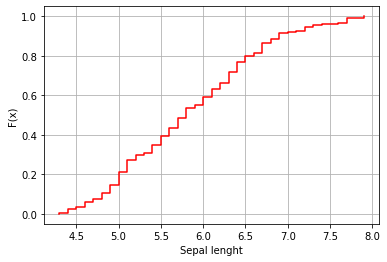

In [6]:
plot_CDF(sl, s_l)

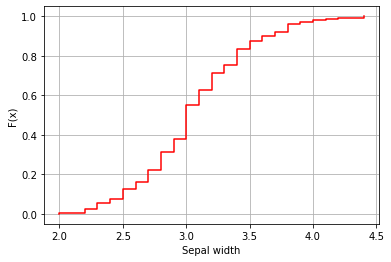

In [7]:
plot_CDF(sw, s_w)

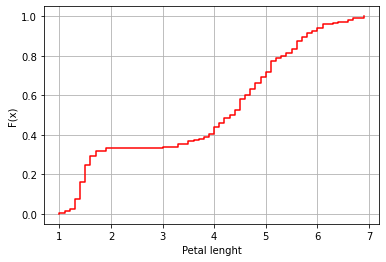

In [8]:
plot_CDF(pl, p_l)

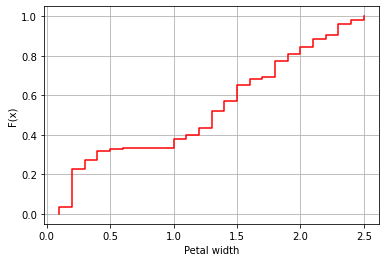

In [9]:
plot_CDF(pw, p_w)

And with that, we have our box plot of Iris dataset and the four cumulative distributions for each attribute